# Copulas: An Essential Guide & Applications in Time Series Forecasting

[Copulas: An Essential Guide & Applications in Time Series Forecasting](https://medium.com/towards-data-science/copulas-an-essential-guide-applications-in-time-series-forecasting-f5c93dcd6e99)

## Beta Distribution

1. Generate samples from a beta distribution $B~(10,3)$.
1. Use the probability integral transform to create uniform samples from the beta distribution.
1. Use inverse sampling to recreate the original beta samples(10,3) from the uniform samples in step 2.

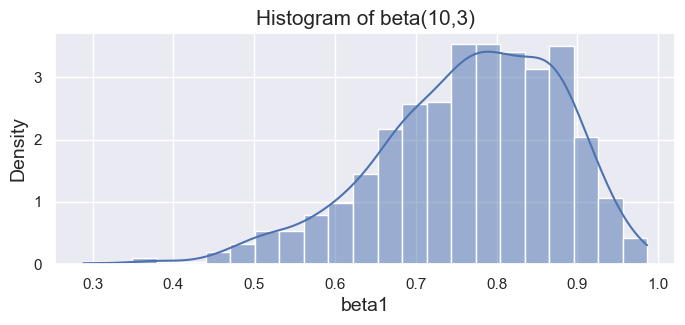

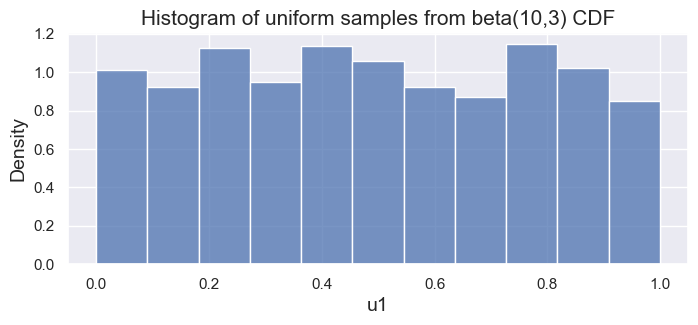

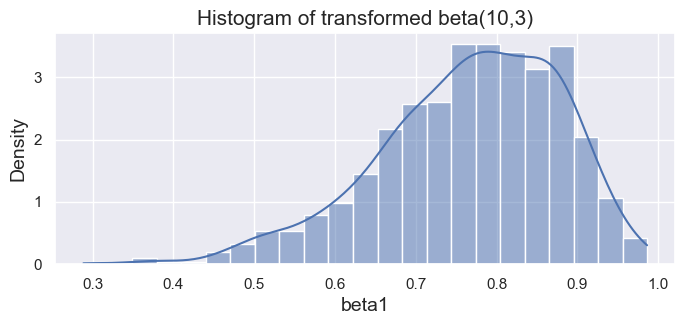

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set(rc={'figure.figsize':(8,3)})

# Step 1: Create a histogram from beta(10,3)
# we start by drawing 1000 samples
beta1 = stats.distributions.beta(a=10, b=3).rvs(1000)
ax = sns.histplot(beta1, kde=True, stat='density')
plt.xlabel("beta1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of beta(10,3)", fontsize=15)
plt.show()

# Step 2: Create a uniform distibution from beta(10,3)
# using the integral probability transform
u1 = stats.beta.cdf(beta1,a=10, b=3)
ax = sns.histplot(u1, stat='density')
plt.xlabel("u1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of uniform samples from beta(10,3) CDF", fontsize=15)
plt.show()

# Step 3: Use inverse sampling to generate beta(10,3) samples
# from the previous uniform samples
# notice that ppf is the inverse cumulative distribution function 
beta_transformed = stats.beta.ppf(u1,a=10, b=3)
ax = sns.histplot(beta_transformed, kde=True, stat='density')
plt.xlabel("beta1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of transformed beta(10,3)", fontsize=15)
plt.show()

## Gamma distribution. 

We leave everything as-is, except for switching beta with gamma:

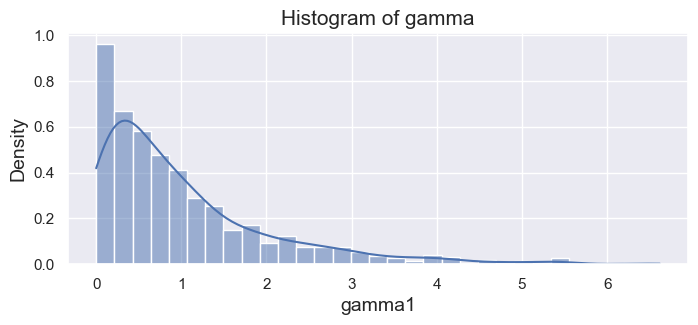

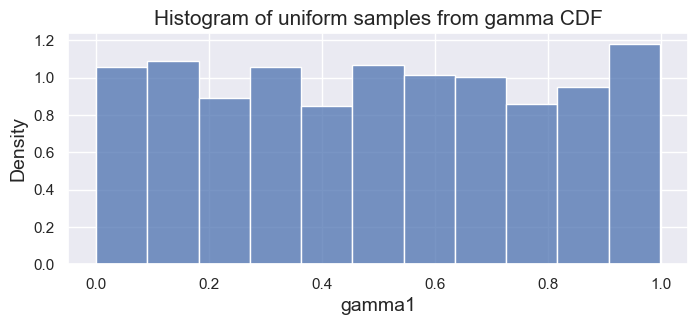

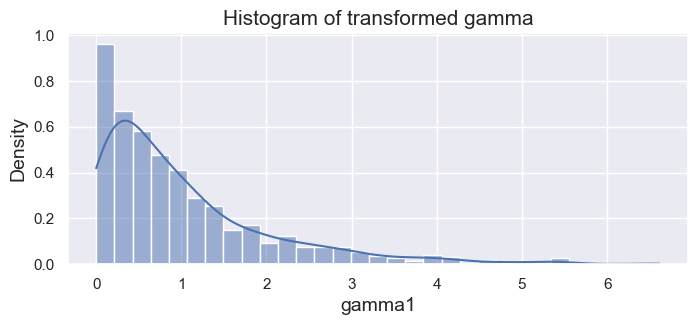

In [2]:
sns.set(rc={'figure.figsize':(8,3)})

# Step 1: Create a histogram from gamma
gamma1 = stats.distributions.gamma(a=1, loc=0).rvs(1000)
ax = sns.histplot(gamma1, kde=True, stat='density')
plt.xlabel("gamma1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of gamma", fontsize=15)
plt.show()

# Step 2: Create a uniform distibution from gamma
u1 = stats.gamma.cdf(gamma1, a=1, loc=0 )
ax = sns.histplot(u1, stat='density')
plt.xlabel("gamma1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of uniform samples from gamma CDF", fontsize=15)
plt.show()

# Step 3: Use inverse sampling to generate gamma samples
gamma_transformed = stats.gamma.ppf(u1,a=1, loc=0)
ax = sns.histplot(gamma_transformed, kde=True, stat='density')
plt.xlabel("gamma1", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Histogram of transformed gamma", fontsize=15)
plt.show()

## Copula

### Marginals

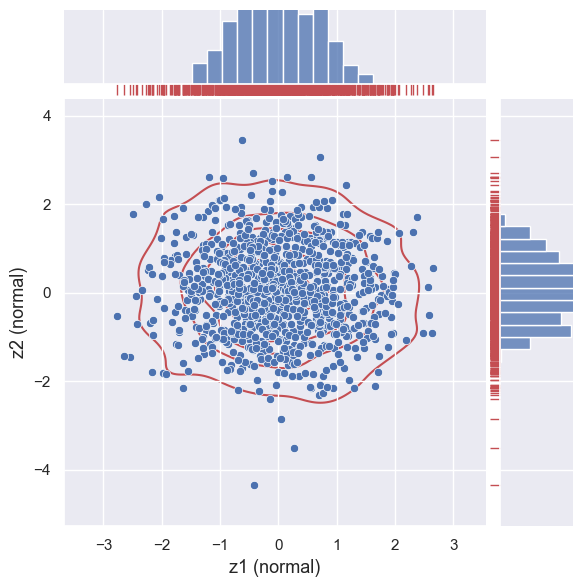

In [3]:
mean1 = 0
std1 = 1
mean2 = 0
std2 = 1

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

z1=np.random.normal(mean1, std1, 1000)
z2=np.random.normal(mean2, std2, 1000)

df_normal=pd.DataFrame({'z1':z1, 'z2':z2})
h = sns.jointplot(x='z1', y='z2', data=df_normal)

h.set_axis_labels('z1 (normal)', 'z2 (normal)', fontsize=13);
h.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
h.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

2. Gaussian variables to uniform 

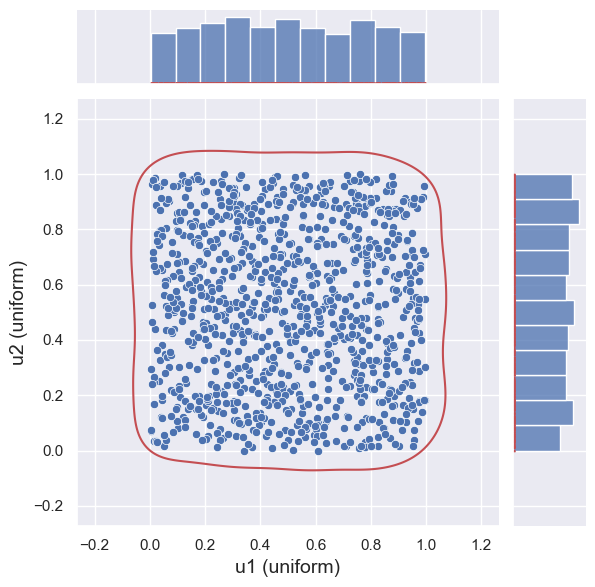

In [6]:
u1 = stats.norm.cdf(z1)
u2 = stats.norm.cdf(z2)

df_uniform=pd.DataFrame({'u1':u1, 'u2':u2})
h = sns.jointplot(x='u1', y='u2', data=df_uniform)

h.set_axis_labels('u1 (uniform)', 'u2 (uniform)', fontsize=14);
h.plot_joint(sns.kdeplot, color="r", levels=1)
h.plot_marginals(sns.rugplot, color="r")

3. create the copula

NameError: name 'cm' is not defined

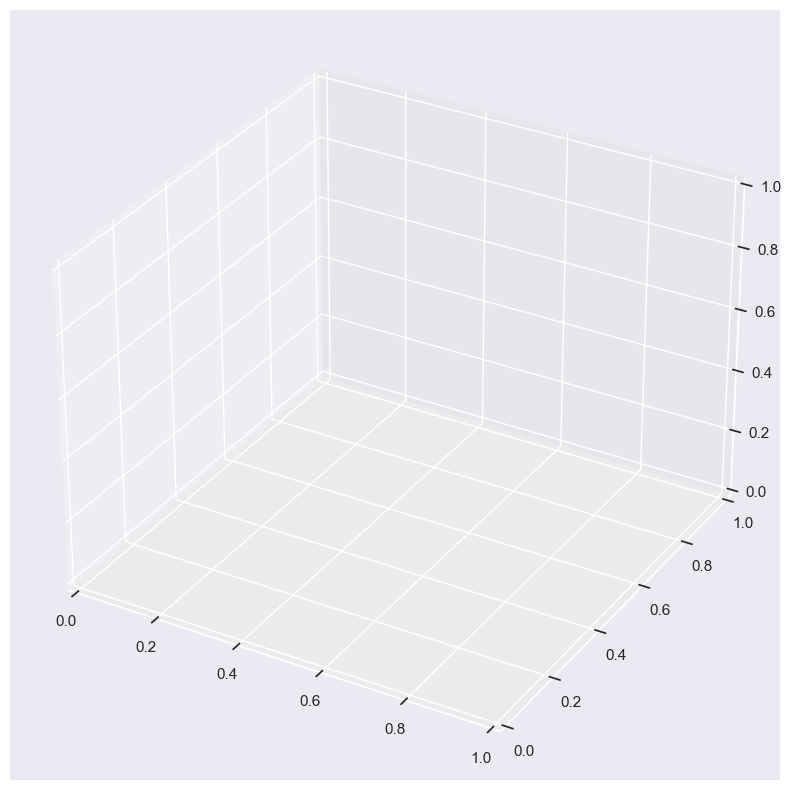

In [7]:
# Gaussian copula: C(u1,u2) = Φ2[ Φ^-1(u1), Φ^-2(u2) ]

#sort the results to make the plot smoother
u1=np.sort(u1)
u2=np.sort(u2)


# make the last sample exactly 1 to make the plot smoother
u1[-1]=1
u2[-1]=1


x1=stats.norm.ppf(u1)  # Φ^-1(u1)
x2=stats.norm.ppf(u2)  # Φ^-1(u2)


# Parameters of Φ2
mu_x = 0
variance_x = 1
mu_y = 0
variance_y = 1
# the covariance parameter is what parameterizes the Gaussian copula
cov=0.8


X, Y = np.meshgrid(x1,x2)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y


#remember phi2_ is just a multivariate normal CDF
rv = stats.multivariate_normal([mu_x, mu_y], [[variance_x, cov], [cov, variance_y]])
phi2 = rv.cdf(pos) 


X, Y = np.meshgrid(u1,u2)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, phi2, cmap=cm.coolwarm, linewidth=0)
ax.invert_yaxis()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Gaussian Copula of (z1,z2)', fontdict={'fontsize': 18})
plt.show()

## Experiment: Using Beta and Gamma as marginals


NameError: name 'cm' is not defined

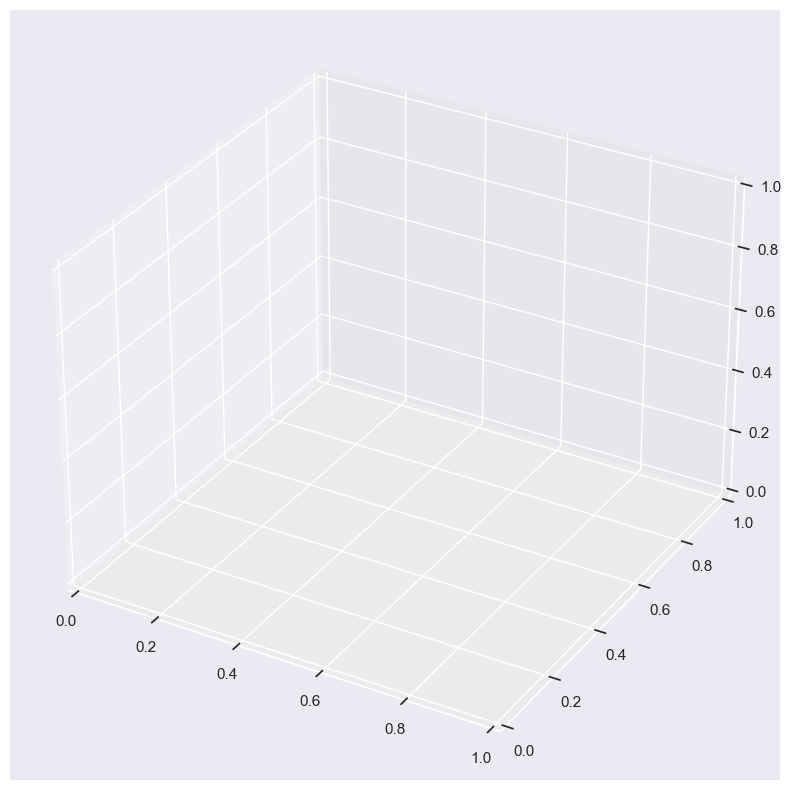

In [8]:
from statsmodels.distributions.empirical_distribution import ECDF

# Gaussian copula: C(u1,u2) = Φ2[ Φ^-1(u1), Φ^-2(u2) ]
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)


# draw our data samples from 2 distributions, a beta and a gamma - 
beta1 = stats.distributions.beta(a=10, b=3).rvs(1000)
gamma1 = stats.distributions.gamma(a=1, loc=0).rvs(1000)


# - we use the emprical cdf instead of beta's or gamma's cdf
# - we do this to show that copulas can be computed regardless of the
#   underlying distributions
ecdf1 = ECDF(beta1)       # F(beta1) = u1
ecdf2 = ECDF(gamma1)      # F(gamma1) = u2


# small correction to remove infinities
ecdf1.y[0]=0.0001
ecdf2.y[0]=0.0001


x1=stats.norm.ppf(ecdf1.y) # Φ^-1(u1)
x2=stats.norm.ppf(ecdf2.y) # Φ^-1(u1)


# Parameters of Φ2
mu_x = 0
variance_x = 1
mu_y = 0
variance_y = 1
cov=0.8


X, Y = np.meshgrid(x1,x2)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

#remember phi2 is just a multivariate normal CDF
rv = stats.multivariate_normal([mu_x, mu_y], [[variance_x, cov], [cov, variance_y]])
phi2=rv.cdf(pos)


X, Y = np.meshgrid(ecdf1.y,ecdf2.y)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, phi2, cmap=cm.coolwarm, linewidth=0)
ax.invert_yaxis()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Gaussian Copula of (beta,gamma)', fontdict={'fontsize': 18})
plt.show()